# Finding the sentiment analysis of the songs 

In [2]:
from helpers import *
import pandas as pd
import numpy as np

In [3]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\nicol\AppData\Local\Temp\ipykernel_16356\1407372790.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
import re
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:
path= "D:\Final-Project-TM\data\lists of songs"

df= pd.read_csv(path + '\dataframe_with_lyrics_completecases.csv')

In [83]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0               songs  \
0               3             3           3       Drip Too Hard   
1               5             5           5        MIDDLE CHILD   
2               6             6           6          SICKO MODE   
3               7             7           7                Suge   
4               8             8           8             7 rings   
..            ...           ...         ...                 ...   
947          1192          1192          93             Thunder   
948          1194          1194          95  Late Night Talking   
949          1195          1195          96            Memories   
950          1196          1196          97         Sex On Fire   
951          1197          1197          98  Castle on the Hill   

              artist                         title  \
0    Lil Baby, Gunna        Top Songs of 2019: USA   
1            J. Cole        Top Songs of 2019: USA   
2       Travis Scott        Top Songs of 2019: USA   
3             DaBaby        Top Songs of 2019: USA   
4      Ariana Grande        Top Songs of 2019: USA   
..               ...                           ...   
947  Imagine Dragons  Top Songs of 2022: Australia   
948     Harry Styles  Top Songs of 2022: Australia   
949         Maroon 5  Top Songs of 2022: Australia   
950    Kings of Leon  Top Songs of 2022: Australia   
951       Ed Sheeran  Top Songs of 2022: Australia   

                                                lyrics enumerated_list  \
0    TranslationsTürkçeDanskDrip Too Hard Lyrics\nR...              []   
1    TranslationsTürkçeEspañolРусскийPortuguêsMIDDL...              []   
2    TranslationsTürkçeEspañolEnglishPortuguêsFranç...              []   
3    Suge Lyrics\nPooh, you a fool for this one\nHa...              []   
4    TranslationsTürkçeEspañolRomânăPortuguêsPolski...              []   
..                                                 ...             ...   
947  TranslationsSlovenčinaPortuguêsΕλληνικάMagyarT...              []   
948  TranslationsTürkçeEspañolPortuguêsहिन्दीDeutsc...              []   
949  TranslationsTürkçePortuguêsPolskiفارسیMemories...              []   
950  Sex on Fire Lyrics\nLay where you're layin'\nD...              []   
951  TranslationsTürkçeEspañolPortuguêsDeutschEd Sh...              []   

     lyrics_not_found  
0               False  
1               False  
2               False  
3               False  
4               False  
..                ...  
947             False  
948             False  
949             False  
950             False  
951             False  

[952 rows x 9 columns]

In [84]:
# Lowercasing
df['lyrics'] = df['lyrics'].str.lower()

# Removing punctuation
df['lyrics'] = df['lyrics'].apply(lambda x: re.sub('[^\w\s]', '', x))

# Tokenization and Stopword removal
stopwords = nltk.corpus.stopwords.words('english')

df['lyrics'] = df['lyrics'].apply(lambda x: [word for word in nltk.word_tokenize(x) if word not in stopwords])

# Stemming
stemmer = nltk.stem.PorterStemmer()
df['lyrics'] = df['lyrics'].apply(lambda x: [stemmer.stem(word) for word in x])

# Removing non-alphabetic characters
df['lyrics'] = df['lyrics'].apply(lambda x: [re.sub('[^A-Za-z0-9]+', '', word) for word in x])


In [85]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0               songs  \
0               3             3           3       Drip Too Hard   
1               5             5           5        MIDDLE CHILD   
2               6             6           6          SICKO MODE   
3               7             7           7                Suge   
4               8             8           8             7 rings   
..            ...           ...         ...                 ...   
947          1192          1192          93             Thunder   
948          1194          1194          95  Late Night Talking   
949          1195          1195          96            Memories   
950          1196          1196          97         Sex On Fire   
951          1197          1197          98  Castle on the Hill   

              artist                         title  \
0    Lil Baby, Gunna        Top Songs of 2019: USA   
1            J. Cole        Top Songs of 2019: USA   
2       Travis Scott        Top Songs of 2019: USA   
3             DaBaby        Top Songs of 2019: USA   
4      Ariana Grande        Top Songs of 2019: USA   
..               ...                           ...   
947  Imagine Dragons  Top Songs of 2022: Australia   
948     Harry Styles  Top Songs of 2022: Australia   
949         Maroon 5  Top Songs of 2022: Australia   
950    Kings of Leon  Top Songs of 2022: Australia   
951       Ed Sheeran  Top Songs of 2022: Australia   

                                                lyrics enumerated_list  \
0    [translationstrkedanskdrip, hard, lyric, run, ...              []   
1    [translationstrkeespaolportugusmiddl, child, l...              []   
2    [translationstrkeespaolenglishportugusfranaisd...              []   
3    [suge, lyric, pooh, fool, one, ha, oh, lord, j...              []   
4    [translationstrkeespaolromnportuguspolskiitali...              []   
..                                                 ...             ...   
947  [translationssloveninaportugusmagyarthund, lyr...              []   
948  [translationstrkeespaolportugusdeutschfranaisl...              []   
949  [translationstrkeportuguspolskimemori, lyric, ...              []   
950  [sex, fire, lyric, lay, your, layin, dont, mak...              []   
951  [translationstrkeespaolportugusdeutsch, sheera...              []   

     lyrics_not_found  
0               False  
1               False  
2               False  
3               False  
4               False  
..                ...  
947             False  
948             False  
949             False  
950             False  
951             False  

[952 rows x 9 columns]

In [86]:
#also removing any words that contain 'translations' in a word like translationstrkeportuguspolskimemori

df['lyrics'] = df['lyrics'].apply(lambda x: [re.sub('[^A-Za-z0-9]+', '', word) for word in x if 'translations' or 'lyric' or 'yeah' or 'like' not in word])

In [87]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0               songs  \
0               3             3           3       Drip Too Hard   
1               5             5           5        MIDDLE CHILD   
2               6             6           6          SICKO MODE   
3               7             7           7                Suge   
4               8             8           8             7 rings   
..            ...           ...         ...                 ...   
947          1192          1192          93             Thunder   
948          1194          1194          95  Late Night Talking   
949          1195          1195          96            Memories   
950          1196          1196          97         Sex On Fire   
951          1197          1197          98  Castle on the Hill   

              artist                         title  \
0    Lil Baby, Gunna        Top Songs of 2019: USA   
1            J. Cole        Top Songs of 2019: USA   
2       Travis Scott        Top Songs of 2019: USA   
3             DaBaby        Top Songs of 2019: USA   
4      Ariana Grande        Top Songs of 2019: USA   
..               ...                           ...   
947  Imagine Dragons  Top Songs of 2022: Australia   
948     Harry Styles  Top Songs of 2022: Australia   
949         Maroon 5  Top Songs of 2022: Australia   
950    Kings of Leon  Top Songs of 2022: Australia   
951       Ed Sheeran  Top Songs of 2022: Australia   

                                                lyrics enumerated_list  \
0    [translationstrkedanskdrip, hard, lyric, run, ...              []   
1    [translationstrkeespaolportugusmiddl, child, l...              []   
2    [translationstrkeespaolenglishportugusfranaisd...              []   
3    [suge, lyric, pooh, fool, one, ha, oh, lord, j...              []   
4    [translationstrkeespaolromnportuguspolskiitali...              []   
..                                                 ...             ...   
947  [translationssloveninaportugusmagyarthund, lyr...              []   
948  [translationstrkeespaolportugusdeutschfranaisl...              []   
949  [translationstrkeportuguspolskimemori, lyric, ...              []   
950  [sex, fire, lyric, lay, your, layin, dont, mak...              []   
951  [translationstrkeespaolportugusdeutsch, sheera...              []   

     lyrics_not_found  
0               False  
1               False  
2               False  
3               False  
4               False  
..                ...  
947             False  
948             False  
949             False  
950             False  
951             False  

[952 rows x 9 columns]

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

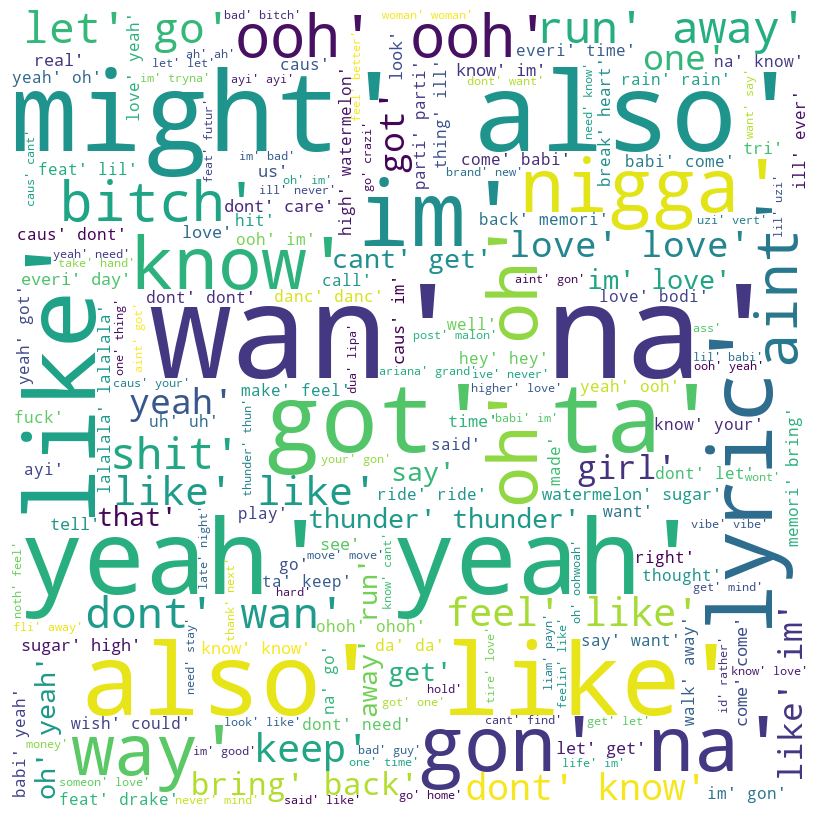

In [89]:
all_lyrics = ' '.join(df['lyrics'].astype('U').tolist())

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_lyrics)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [90]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the DataFrame
#df = pd.read_csv('lyrics.csv')

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each row in the DataFrame
def get_sentiment(row):
    lyrics = row['lyrics']
    # Convert the list of lyrics to a string
    lyrics_str = ' '.join(lyrics)
    # Calculate the sentiment score for the lyrics string
    sentiment_score = sia.polarity_scores(lyrics_str)
    # Convert the sentiment score to a dictionary
    sentiment_dict = dict(sentiment_score)
    return sentiment_dict

# Apply the function to the DataFrame
df['sentiment'] = df.apply(get_sentiment, axis=1)

# Extract the sentiment score from the 'sentiment' column and add it to the DataFrame as separate columns
df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

In [91]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0               songs  \
0               3             3           3       Drip Too Hard   
1               5             5           5        MIDDLE CHILD   
2               6             6           6          SICKO MODE   
3               7             7           7                Suge   
4               8             8           8             7 rings   
..            ...           ...         ...                 ...   
947          1192          1192          93             Thunder   
948          1194          1194          95  Late Night Talking   
949          1195          1195          96            Memories   
950          1196          1196          97         Sex On Fire   
951          1197          1197          98  Castle on the Hill   

              artist                         title  \
0    Lil Baby, Gunna        Top Songs of 2019: USA   
1            J. Cole        Top Songs of 2019: USA   
2       Travis Scott        Top Songs of 2019: USA   
3             DaBaby        Top Songs of 2019: USA   
4      Ariana Grande        Top Songs of 2019: USA   
..               ...                           ...   
947  Imagine Dragons  Top Songs of 2022: Australia   
948     Harry Styles  Top Songs of 2022: Australia   
949         Maroon 5  Top Songs of 2022: Australia   
950    Kings of Leon  Top Songs of 2022: Australia   
951       Ed Sheeran  Top Songs of 2022: Australia   

                                                lyrics enumerated_list  \
0    [translationstrkedanskdrip, hard, lyric, run, ...              []   
1    [translationstrkeespaolportugusmiddl, child, l...              []   
2    [translationstrkeespaolenglishportugusfranaisd...              []   
3    [suge, lyric, pooh, fool, one, ha, oh, lord, j...              []   
4    [translationstrkeespaolromnportuguspolskiitali...              []   
..                                                 ...             ...   
947  [translationssloveninaportugusmagyarthund, lyr...              []   
948  [translationstrkeespaolportugusdeutschfranaisl...              []   
949  [translationstrkeportuguspolskimemori, lyric, ...              []   
950  [sex, fire, lyric, lay, your, layin, dont, mak...              []   
951  [translationstrkeespaolportugusdeutsch, sheera...              []   

     lyrics_not_found                                          sentiment  \
0               False  {'neg': 0.258, 'neu': 0.677, 'pos': 0.065, 'co...   
1               False  {'neg': 0.156, 'neu': 0.683, 'pos': 0.16, 'com...   
2               False  {'neg': 0.104, 'neu': 0.568, 'pos': 0.327, 'co...   
3               False  {'neg': 0.155, 'neu': 0.531, 'pos': 0.314, 'co...   
4               False  {'neg': 0.091, 'neu': 0.519, 'pos': 0.39, 'com...   
..                ...                                                ...   
947             False  {'neg': 0.02, 'neu': 0.887, 'pos': 0.093, 'com...   
948             False  {'neg': 0.038, 'neu': 0.8, 'pos': 0.162, 'comp...   
949             False  {'neg': 0.12, 'neu': 0.682, 'pos': 0.198, 'com...   
950             False  {'neg': 0.141, 'neu': 0.638, 'pos': 0.221, 'co...   
951             False  {'neg': 0.072, 'neu': 0.796, 'pos': 0.132, 'co...   

       neg    neu    pos  compound  
0    0.258  0.677  0.065   -0.9968  
1    0.156  0.683  0.160   -0.2671  
2    0.104  0.568  0.327    0.9988  
3    0.155  0.531  0.314    0.9956  
4    0.091  0.519  0.390    0.9969  
..     ...    ...    ...       ...  
947  0.020  0.887  0.093    0.9313  
948  0.038  0.800  0.162    0.9555  
949  0.120  0.682  0.198    0.9497  
950  0.141  0.638  0.221    0.8779  
951  0.072  0.796  0.132    0.9300  

[952 rows x 14 columns]

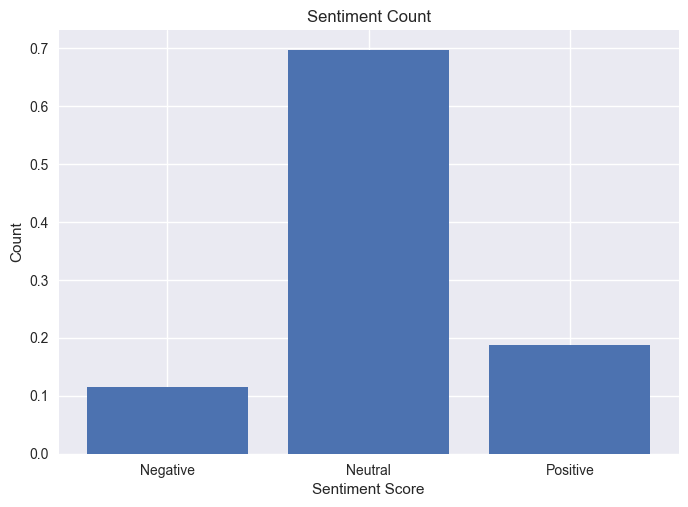

In [92]:
neg_mean = df['neg'].mean()
neu_mean = df['neu'].mean()
pos_mean = df['pos'].mean()

mean_values = [neg_mean, neu_mean, pos_mean]

# Create a list of the x-axis labels
labels = ['Negative', 'Neutral', 'Positive']

# Create a bar plot of the mean values
plt.bar(labels, mean_values)


# Set the plot title and axis labels
plt.title('Sentiment Count')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')

# Show the plot
plt.show()

For most of the songs, the highest score is the neutral sentiment.

## Creating different dataframes for each country's playlist

In [105]:
groups=df['title'].unique()
new_dfs={}
for group in groups:
    name = str(group)
    new_dfs[name] = df[df['title'] == group]

new_dfs['Top Songs of 2019: USA']=USA2019


In [113]:
USA2020=new_dfs['Top Songs of 2020: USA']
USA2021=new_dfs['Top Songs of 2021: USA']
USA2022=new_dfs['Top Songs of 2022: USA']
NZ2019=new_dfs['Top Songs of 2019: New Zealand']
NZ2020=new_dfs['Top Songs of 2020: New Zealand']
NZ2021=new_dfs['Top Songs of 2021: New Zealand']
NZ2022=new_dfs['Top Songs of 2022: New Zealand']
AUS2019=new_dfs['Top Songs of 2019: Australia']
AUS2020=new_dfs['Top Songs of 2020: Australia']
AUS2021=new_dfs['Top Songs of 2021: Australia']
AUS2022=new_dfs['Top Songs of 2022: Australia']

## word clouds for each country and seeing the most popular words

In [120]:
def generate_wordclouds(alldfs):
    for df in alldfs:
        # Combine all lyrics into a single string
        lyrics = " ".join(df['lyrics'].astype('U').tolist())
        title = df.iloc[0]['title']
        # Generate word cloud
        wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(lyrics)

        # Plot word cloud
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(title)
        plt.tight_layout(pad=0)
        plt.show()
alldfs=[USA2019,USA2020,USA2021,USA2022,NZ2019,NZ2020,NZ2021,NZ2022,AUS2019,AUS2020,AUS2021,AUS2022]


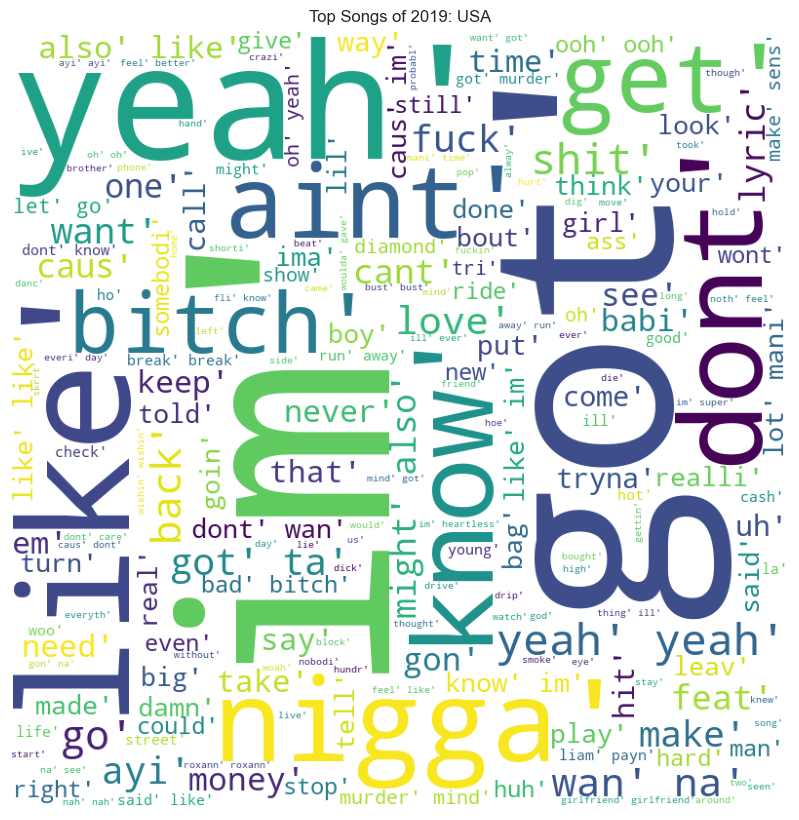

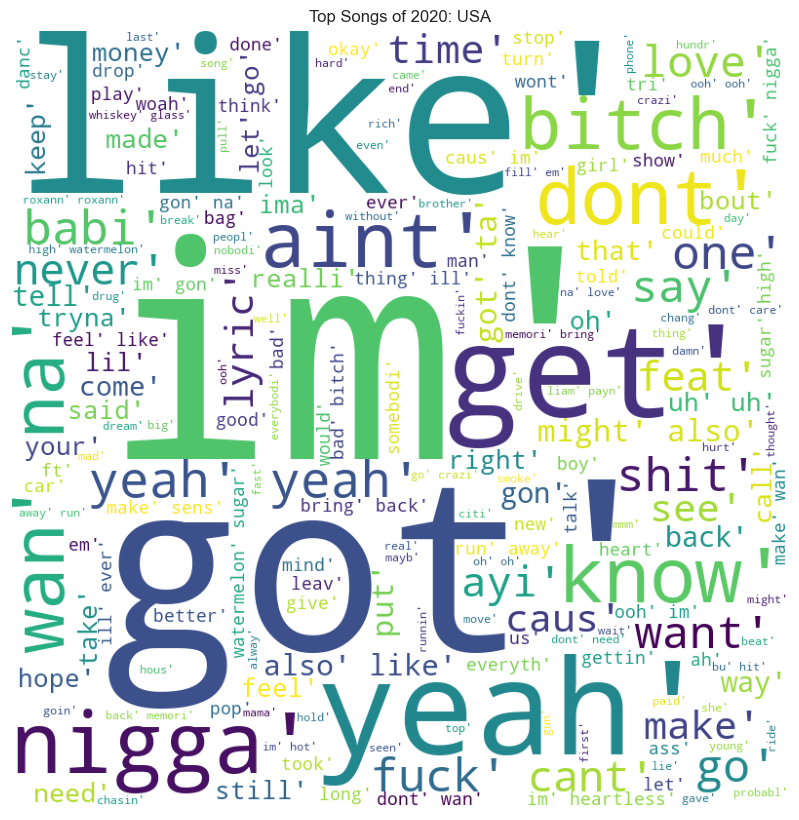

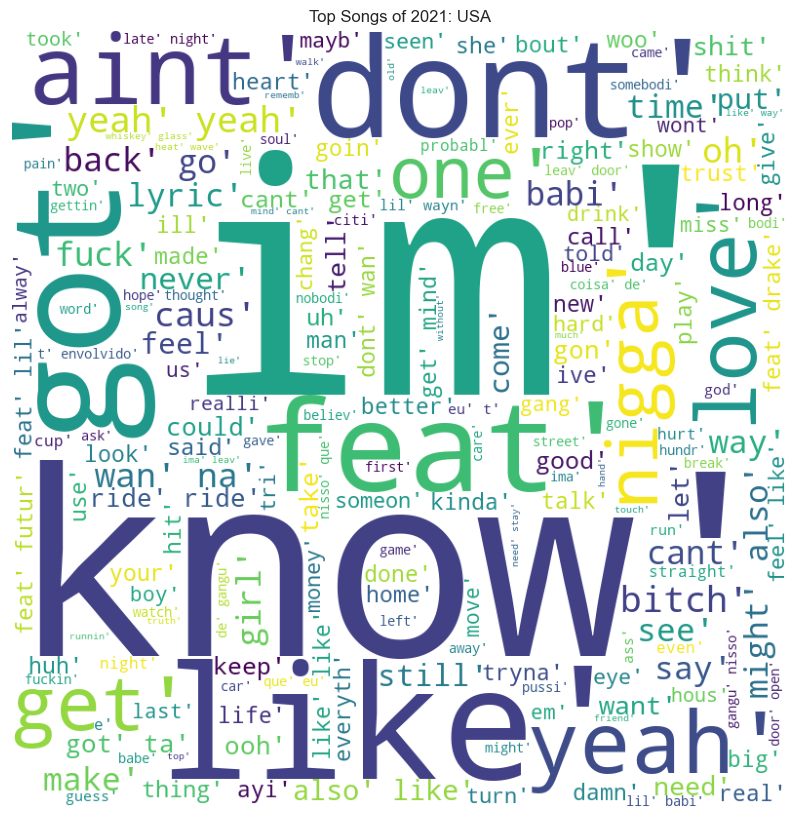

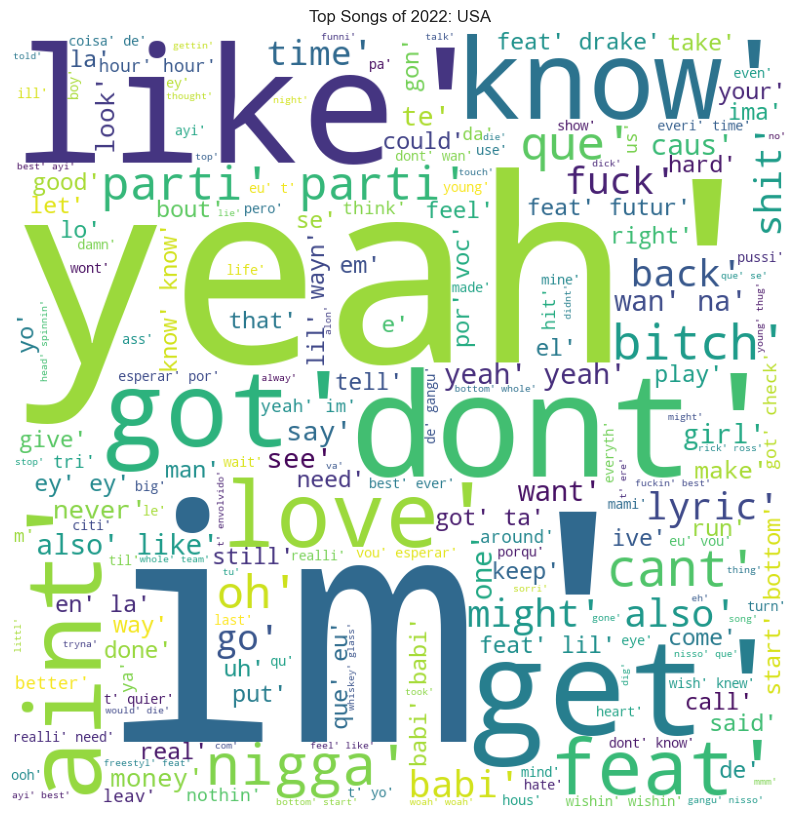

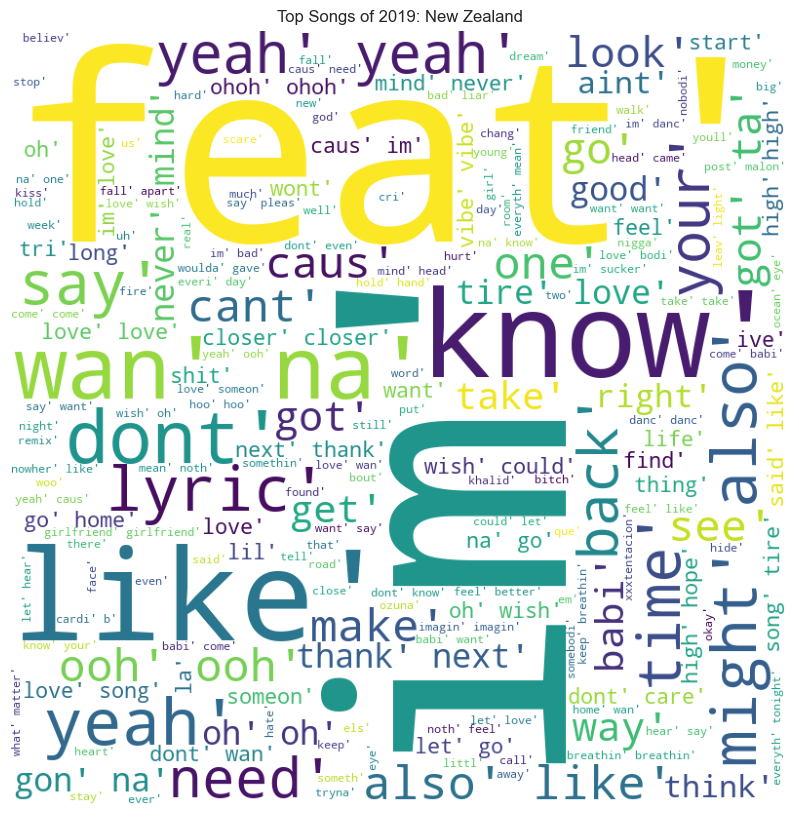

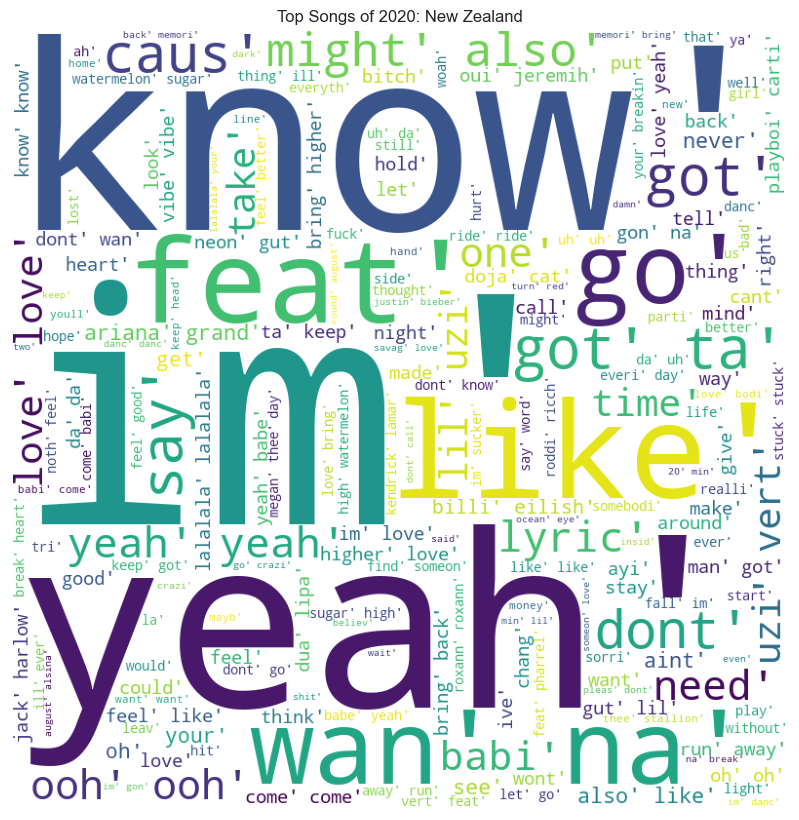

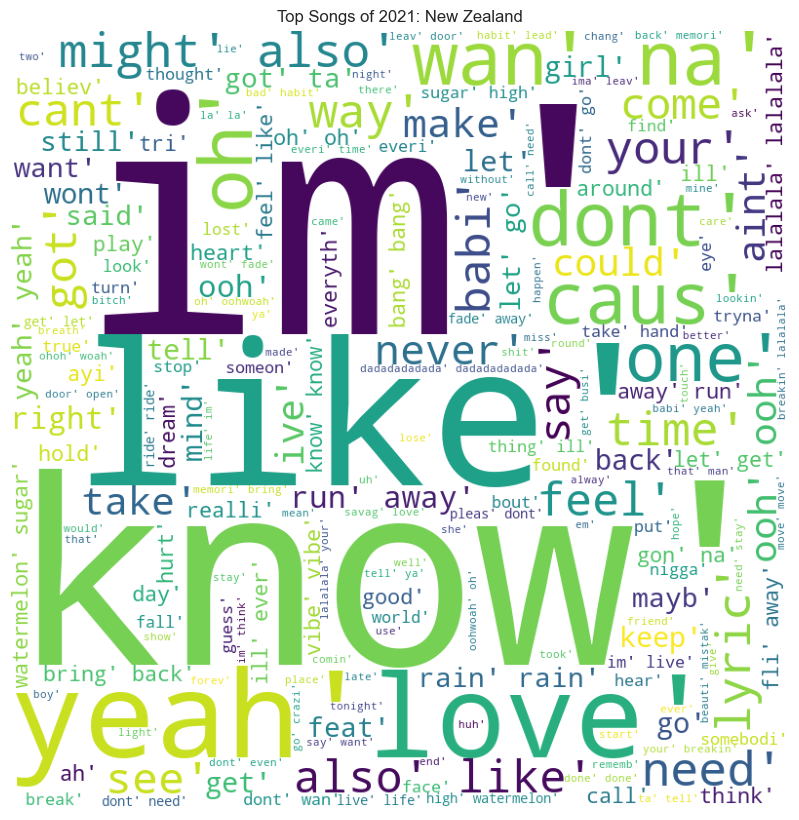

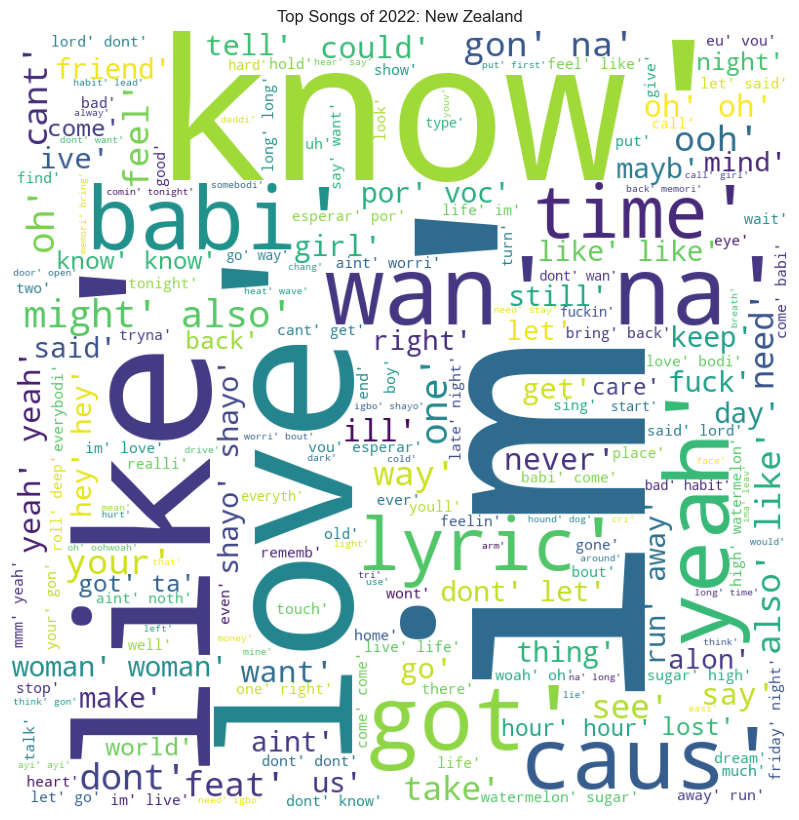

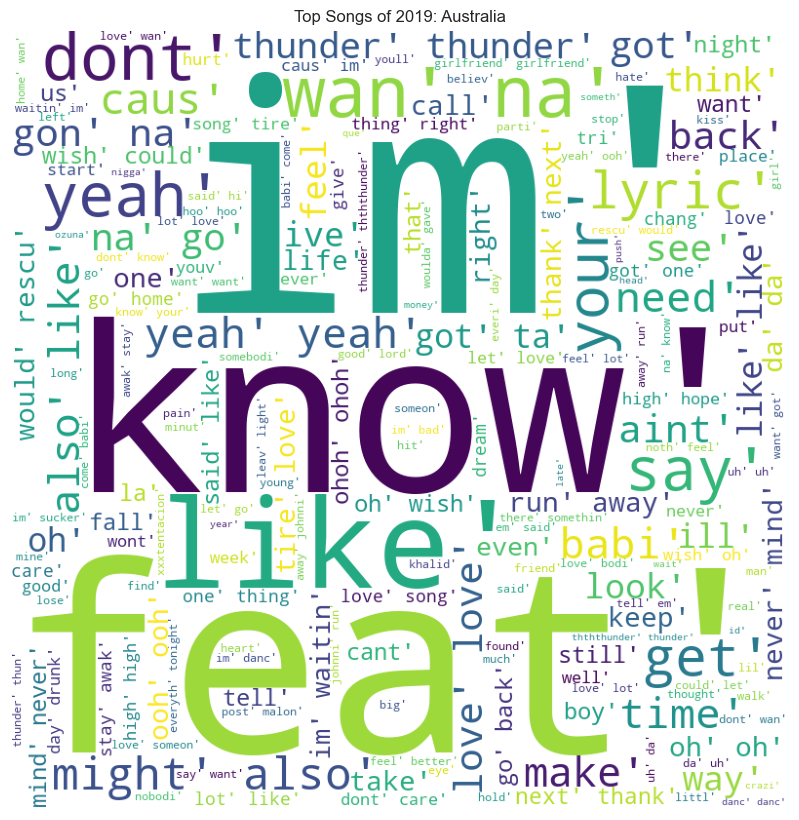

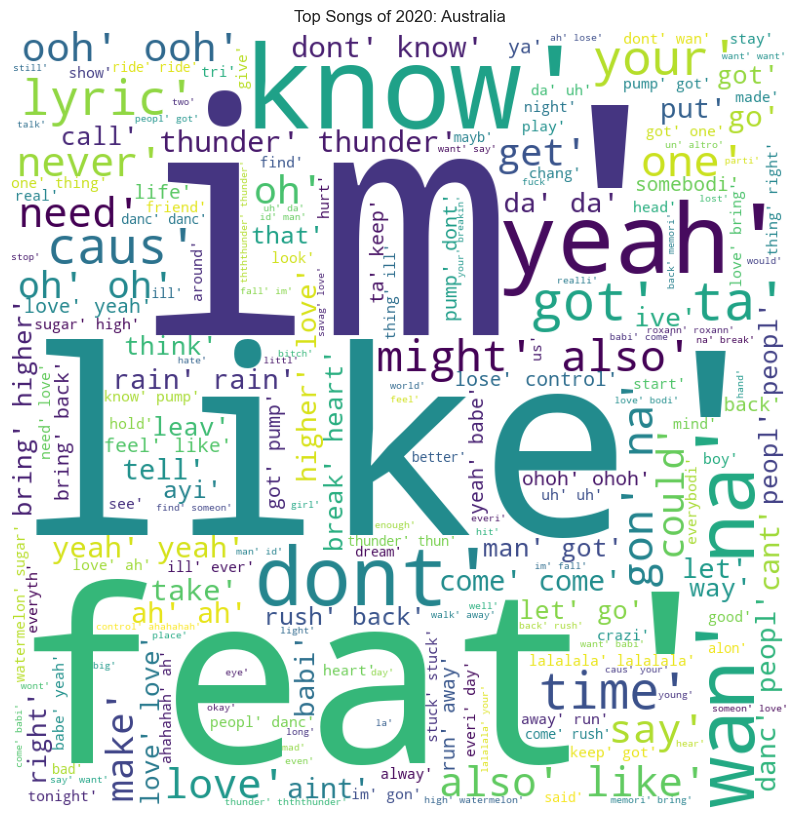

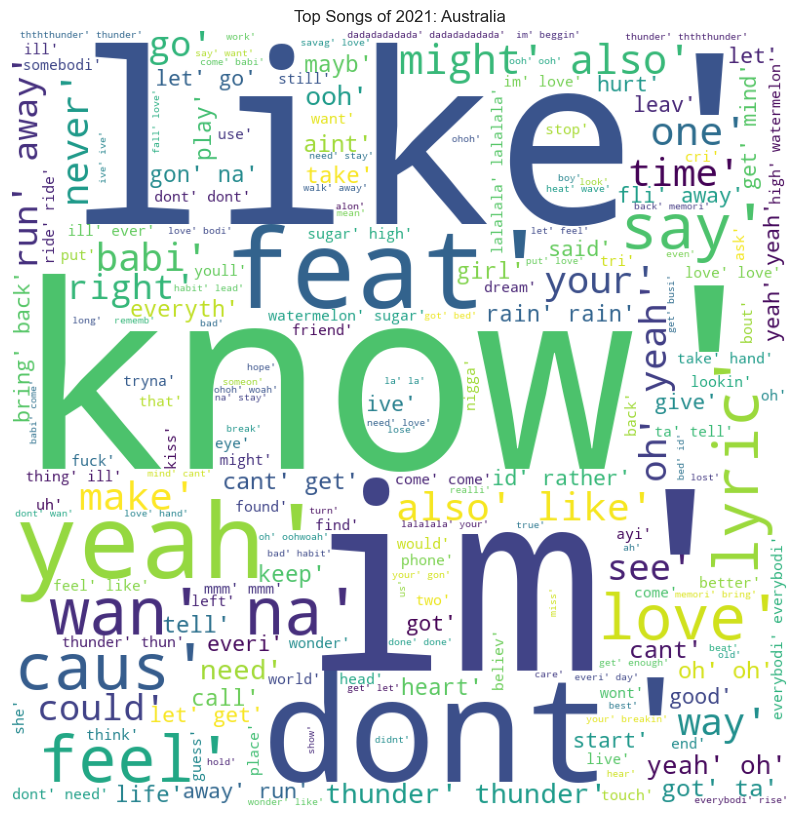

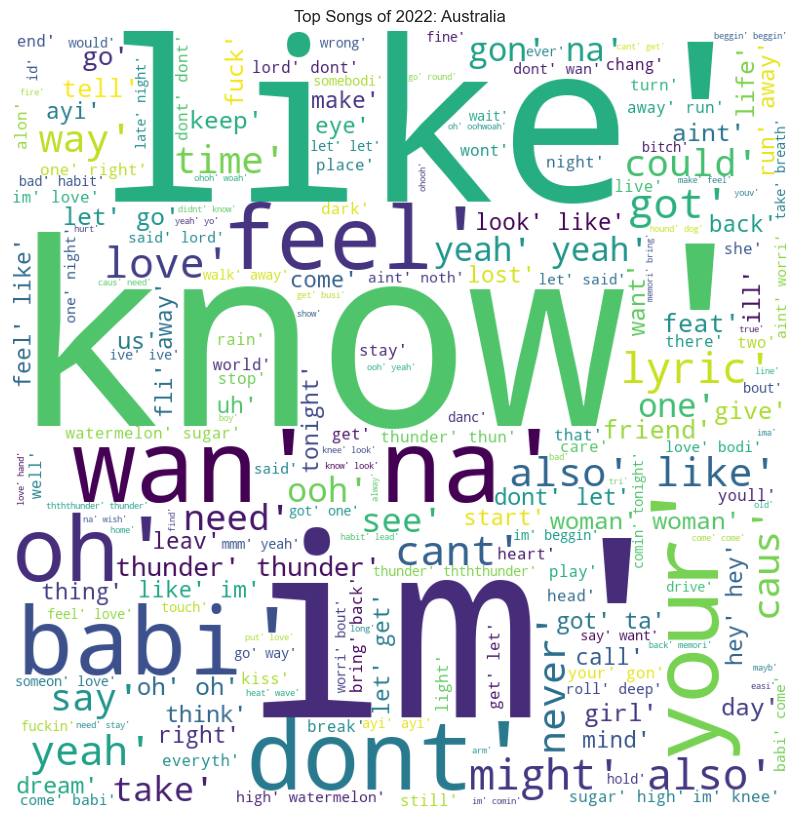

In [121]:
generate_wordclouds(alldfs)

## The average sentiment in each country/ year

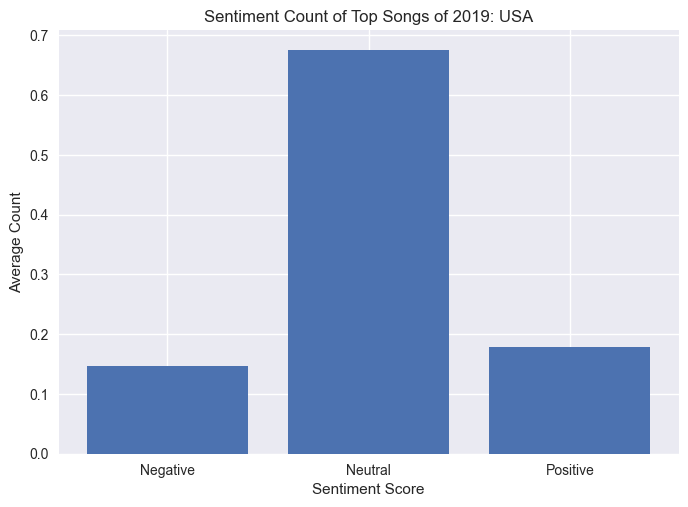

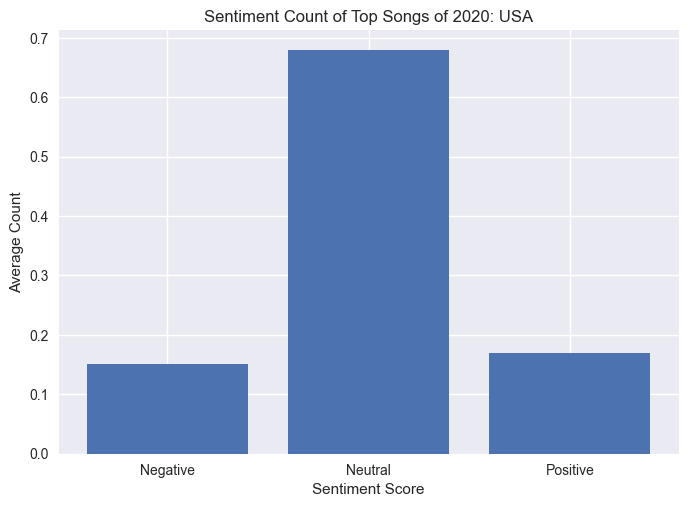

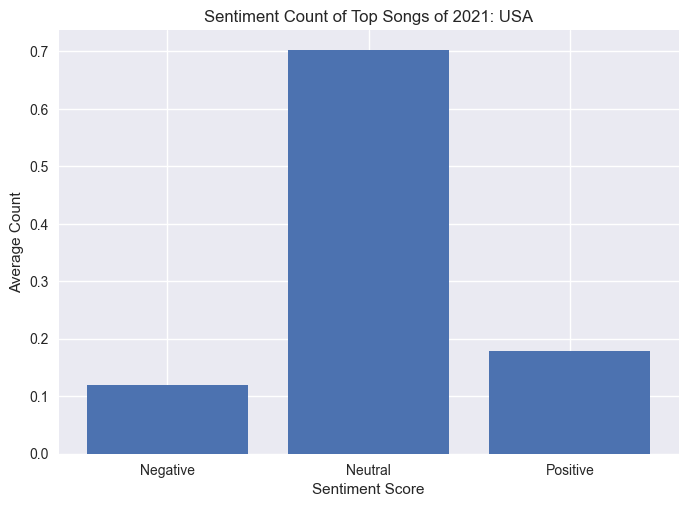

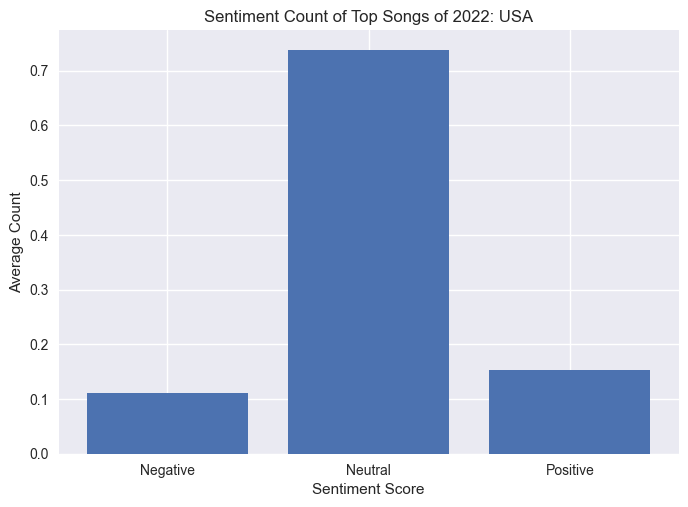

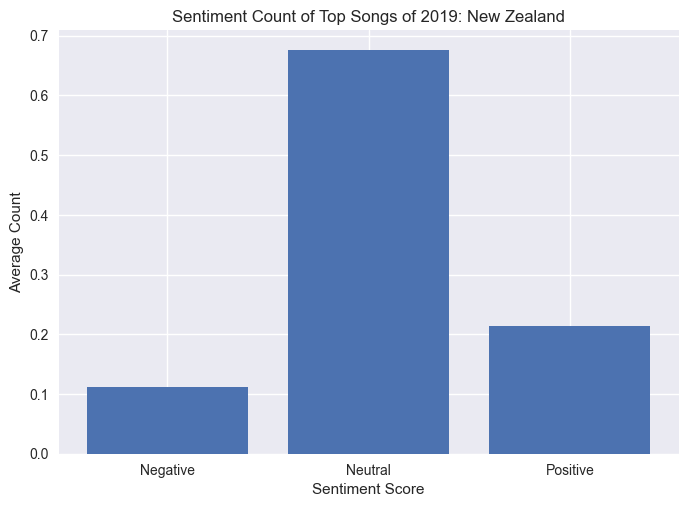

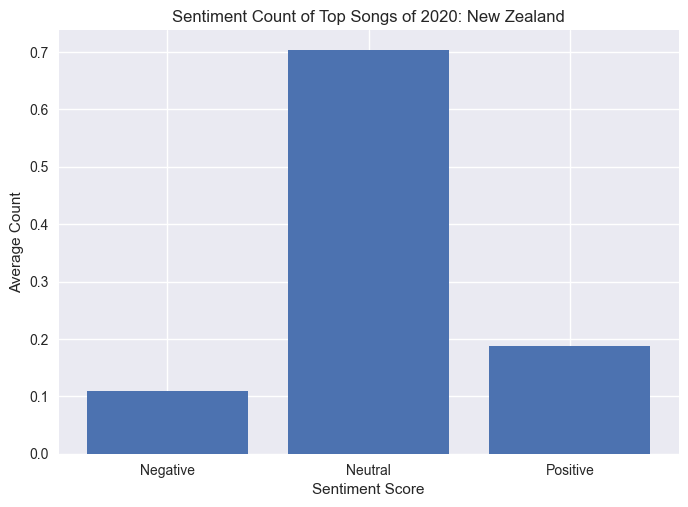

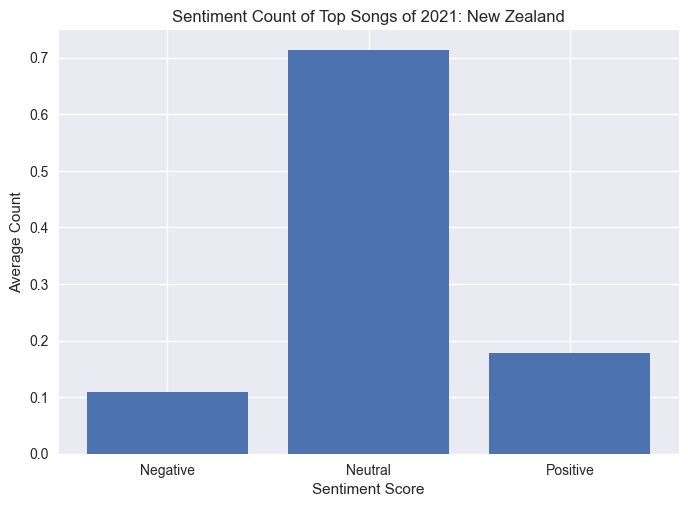

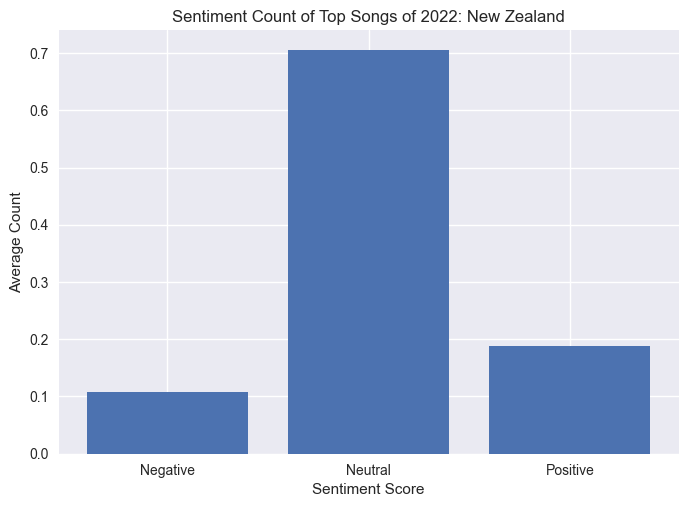

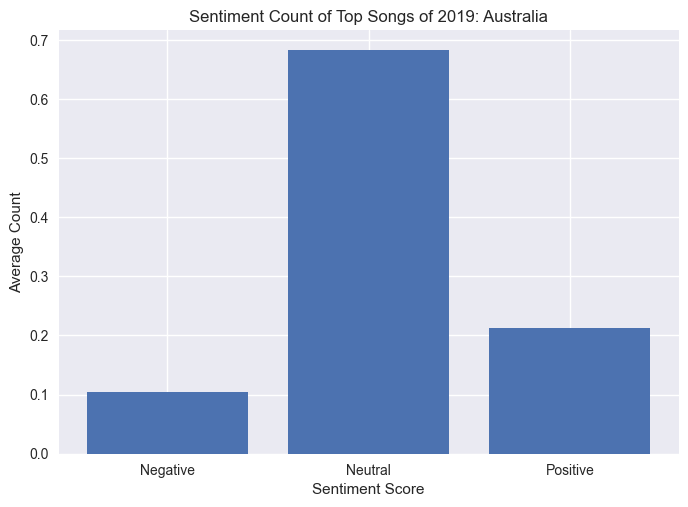

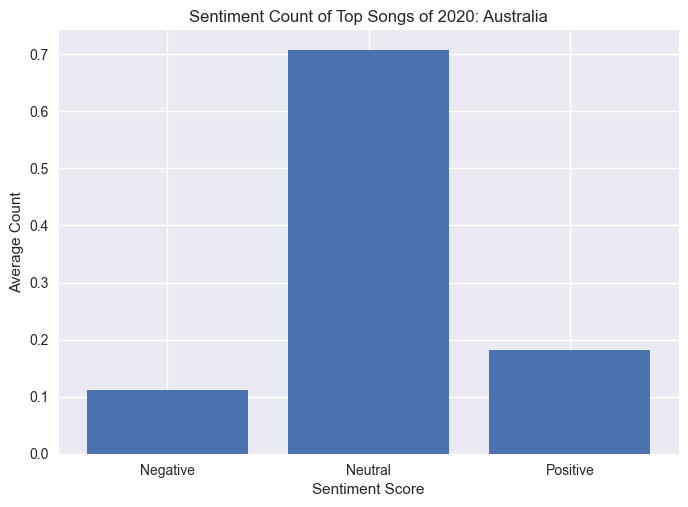

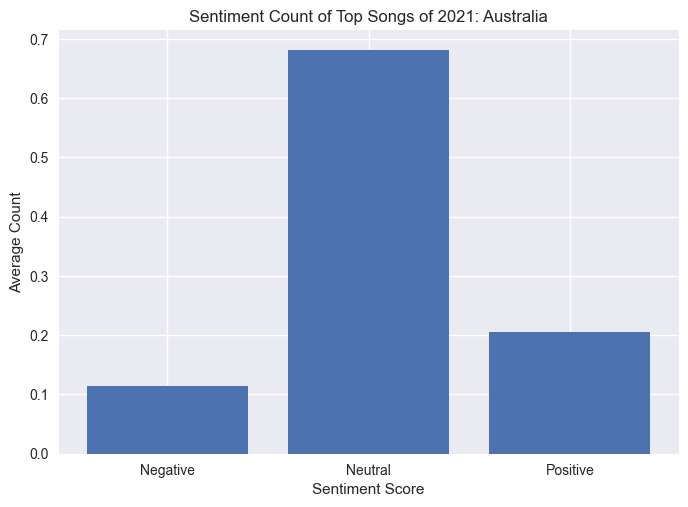

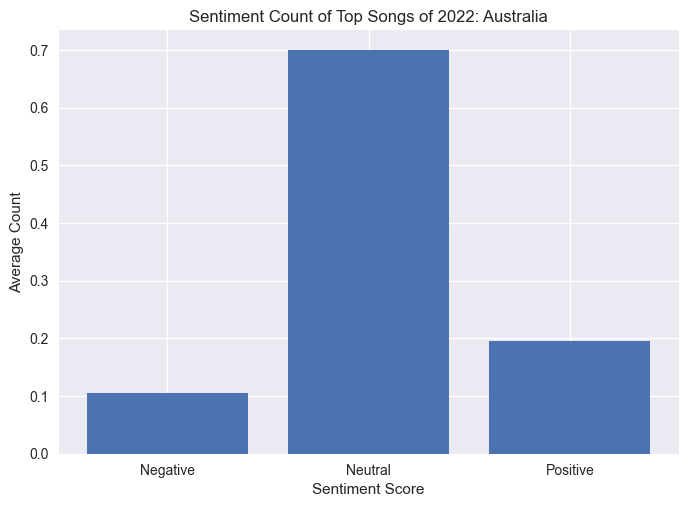

In [124]:
def histogram(alldfs):
    for df in alldfs:
        neg_mean = df['neg'].mean()
        neu_mean = df['neu'].mean()
        pos_mean = df['pos'].mean()

        mean_values = [neg_mean, neu_mean, pos_mean]
        # Create a list of the x-axis labels
        labels = ['Negative', 'Neutral', 'Positive']
        title = df.iloc[0]['title']
        # Create a bar plot of the mean values
        plt.bar(labels, mean_values)


        # Set the plot title and axis labels
        plt.title('Sentiment Count of '+ title)
        plt.xlabel('Sentiment Score')
        plt.ylabel('Average Count')

        # Show the plot
        plt.show()
histogram(alldfs)